# Introduction to Scikit-Learn: Machine Learning with Python

## Outline

**Main Goal:** To introduce the central concepts of machine learning, and how they can be applied in Python using the Scikit-learn Package.

- Data representation in scikit-learn
- Introduction to the Scikit-learn API

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

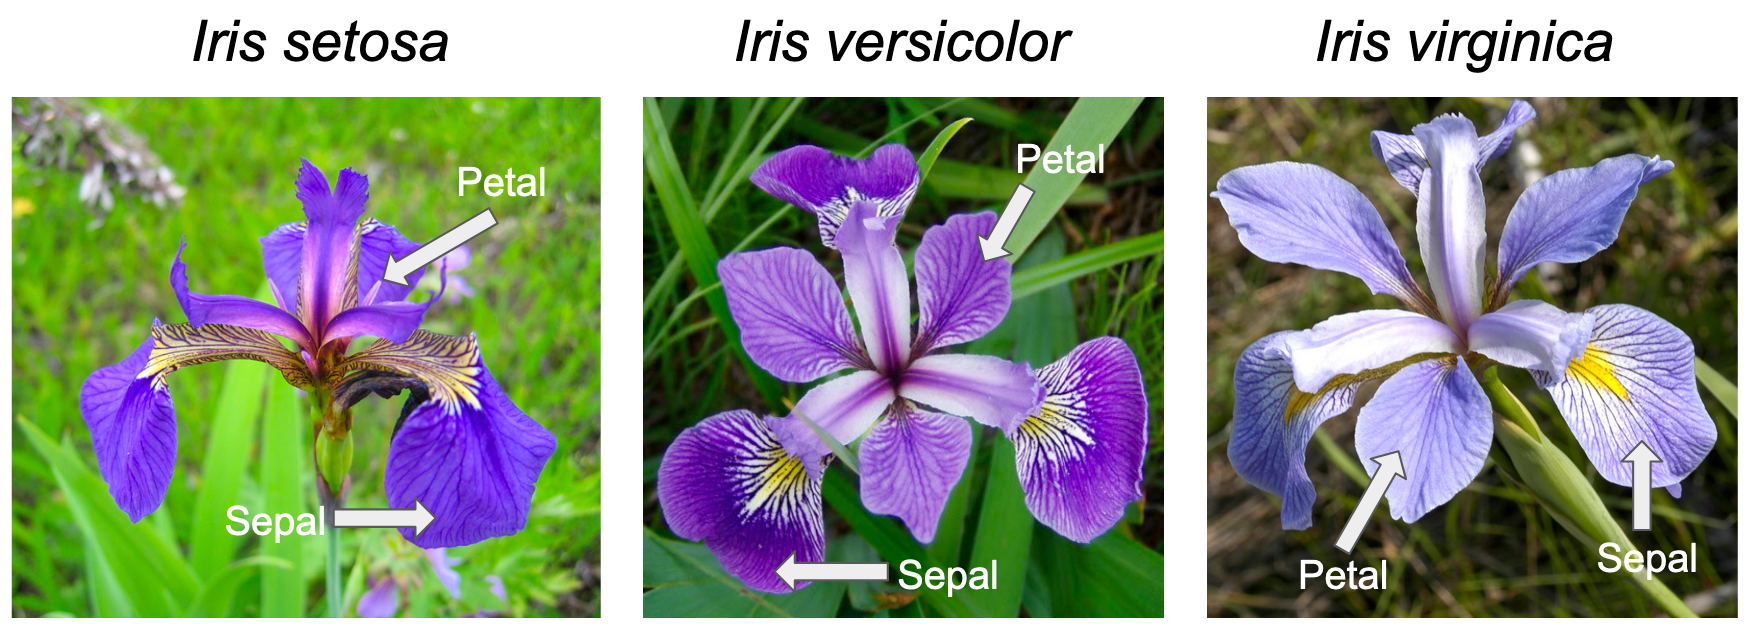

In [1]:
from IPython.display import Image, display
display(Image(filename='iris-dataset-image.png'))

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

We can easily load the iris dataset as follows.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

What we obtain is a dictionary with the following structure:
* data contains the input features;
* target contains the label for each sample.

We will see later the other fields.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Then, we can retrieve the number of samples and the number of features.

In [4]:
n_samples, n_features = iris.data.shape
print(f'n_samples={n_samples}, n_features={n_features}')
print(f'Sample at index 0: {iris.data[0]}')

n_samples=150, n_features=4
Sample at index 0: [5.1 3.5 1.4 0.2]


Let's check the shape of the input and output data.

In [5]:
print(f'Shape of field "data": {iris.data.shape}')
print(f'Shape of field "target": {iris.target.shape}')

Shape of field "data": (150, 4)
Shape of field "target": (150,)


Now let's check the field `target` and `target_names`.
* `target` contains the label for each sample;
* `target_names` contains the label in string.

In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot. Changing `x_index` and `y_index` we may find a combination of two parameters
which maximally separate the three classes.


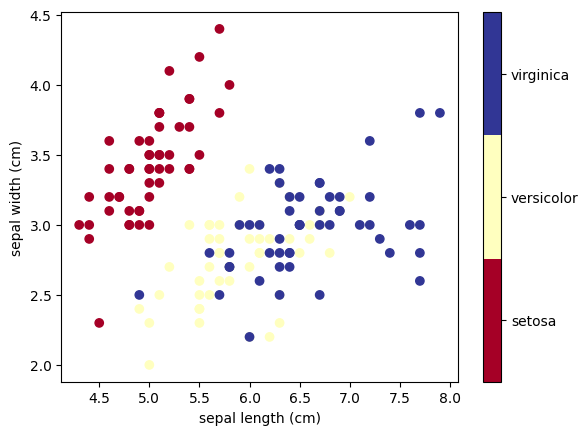

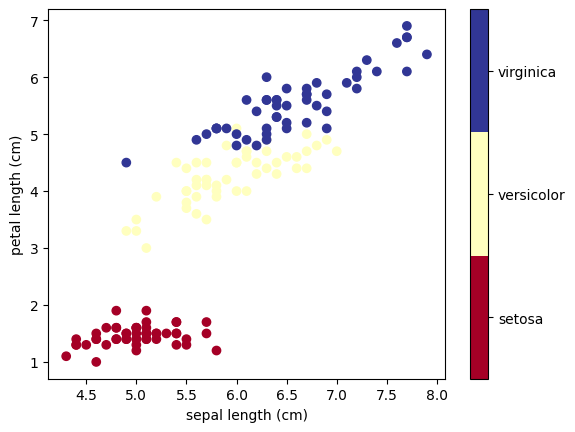

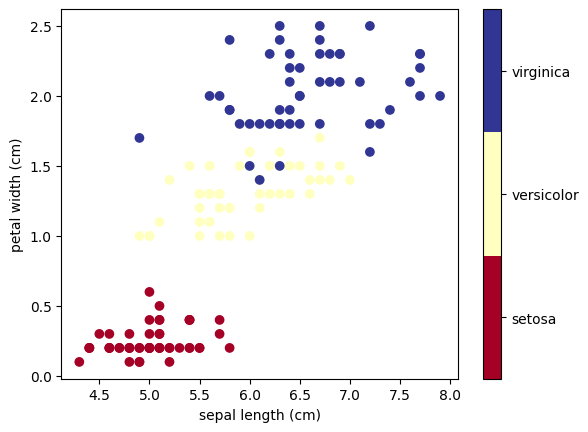

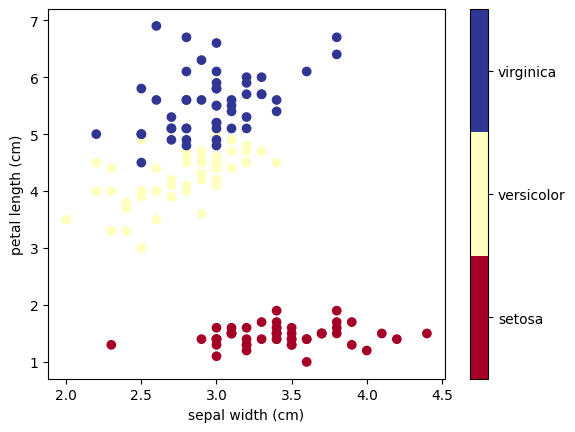

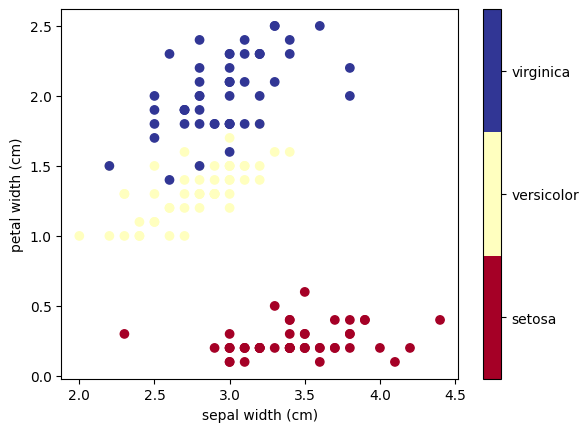

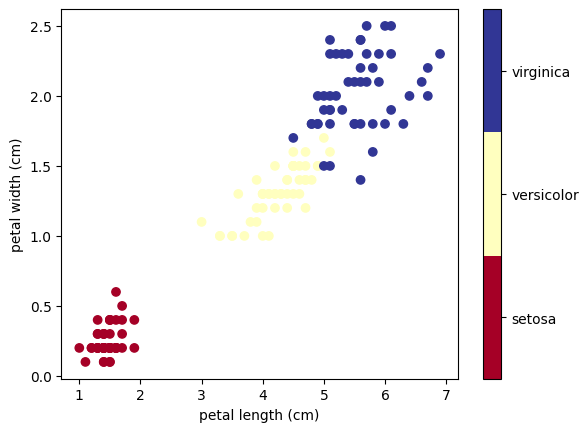

In [8]:
from utilities.ml_plot_utilities import plot_2d_feature_space_by_class
from itertools import combinations

# List of indices
indices = list(range(len(iris.feature_names)))

# Find all possible pair combinations
paired_features = list(combinations(indices, 2))

for features in paired_features:
    plot_2d_feature_space_by_class(iris.data, iris.target, iris.feature_names, 
                                   features[0], features[1], iris.target_names)

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.